![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)

# Perception in Robotics

Summer Semester 2024, Friedrich-Alexander-Universität Erlangen-Nürnberg

# 2. Exercise - Image Filtering

In this exercise, we will cover image filtering using the [OpenCV](https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html) and [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) python libraries. As example images we will use samples from the [Kodak](https://r0k.us/graphics/kodak/) dataset.

The goal of this exercise is the become familiar with different types of noise and filtering.

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

In [1]:
%matplotlib inline
# Import libaries which we will use in this exercise.
import cv2
import numpy as np
import matplotlib.pyplot as plt

## A. Image Noise

To study the impact of different types of noise, load the image (`kodim21.png`) and convert it to grayscale by using **OpenCV**. 

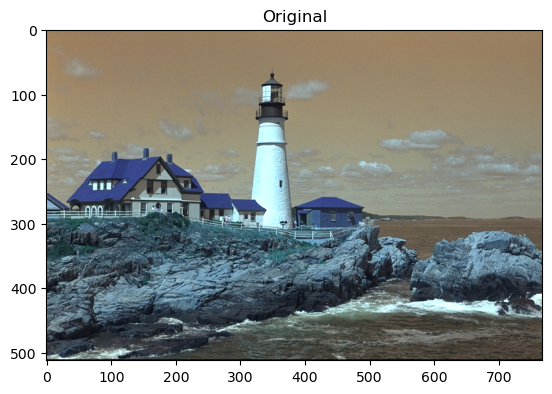

(512, 768)


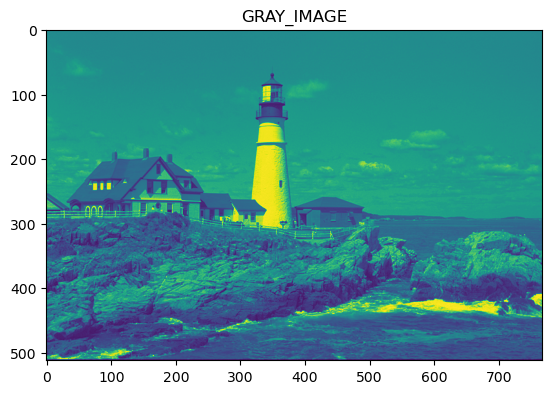

In [2]:
imag=cv2.imread("./kodim21.png")
plt.imshow(imag)
plt.title("Original")
plt.show()
gray_image=cv2.cvtColor(imag,cv2.COLOR_BGR2GRAY)
print(gray_image.shape)
#cv2.imshow("gray image",gray_image)
plt.imshow(gray_image)
plt.title("GRAY_IMAGE")
plt.show()

### Salt and Pepper Noise
Random occurrence of black and white pixels in an image is called [salt and pepper noise](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

Implement a function that adds salt and pepper noise to a given grayscale image by using numpy and plot the resulting image.

Note: Use a number of white and black pixels each between 300 and 10000.

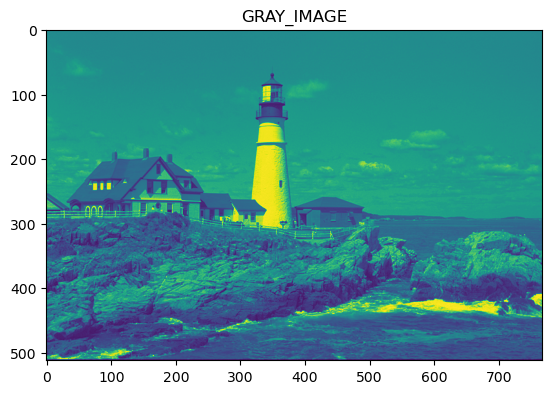

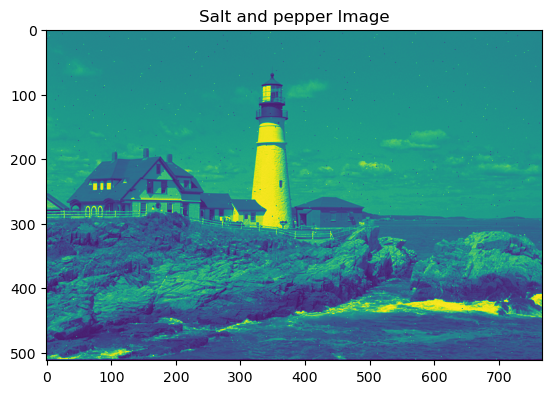

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
def add_salt_pepper_noise(img): 
    noisy_image=np.copy(img)
    row,col=img.shape
    num_pixels=np.random.randint(300,1001)
    for i in range(num_pixels):
        y_coord=np.random.randint(0,row-1)
        x_coord=np.random.randint(0,col-1)
        noisy_image[y_coord][x_coord]=255
    for i in range(num_pixels):
        y_coord=np.random.randint(0,row-1)
        x_coord=np.random.randint(0,col-1)
        noisy_image[y_coord][x_coord]=0
    return noisy_image
salt_and_pepper_img=add_salt_pepper_noise(gray_image)
plt.imshow(gray_image)
plt.title("GRAY_IMAGE")
plt.show()
plt.imshow(salt_and_pepper_img)
plt.title("Salt and pepper Image")
plt.show()


### Gaussian Noise
Intensity variation based on a probability density function equal to
the normal distribution. Commonly used to model sensor noise.

Implement a function that adds gaussian noise to a given grayscale image by using numpy and plot the resulting image.

Note: Convert image and noise to the same data type and account for values larger than the range of pixel values e.g., 255 after adding noise. Use a standard deviation of 0.05 for the gaussian noise.

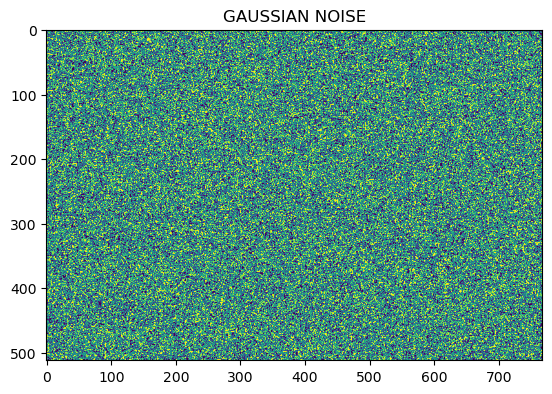

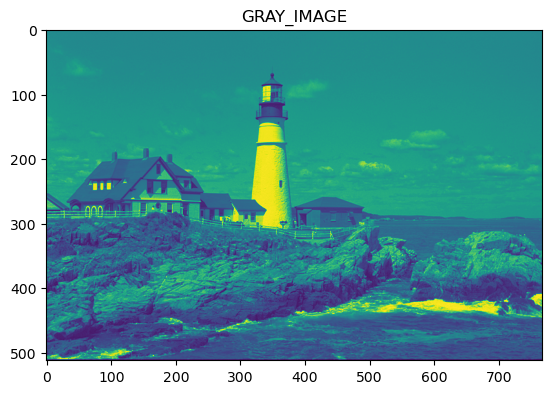

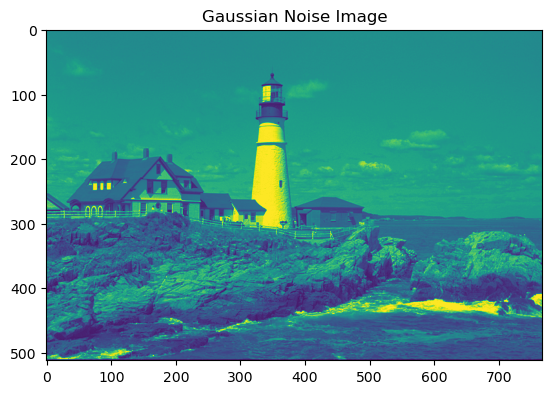

In [51]:
def add_gaussian_noise(img):
    mean=5
    s_d=0.05
    gaussian_noise=np.random.normal(mean,s_d,img.shape).astype(np.uint8)
    plt.imshow(gaussian_noise)
    plt.title("GAUSSIAN NOISE")
    plt.show()
    gaussian_image=cv2.add(img,gaussian_noise)
    gaussian_image=np.clip(gaussian_image,0,255).astype(np.uint8)
    return gaussian_image
gaussian_noise_image=add_gaussian_noise(gray_image)
plt.imshow(gray_image)
plt.title("GRAY_IMAGE")
plt.show()
plt.imshow(gaussian_noise_image)
plt.title("Gaussian Noise Image")
plt.show()


## B. Convolution
Implement the convolution algorithm in numpy, with stride 1. Your implementation shall be able to handle kernels with size 3x3 and 5x5, and should not make use of any library calls to perform the actual convolution.

Note: To obtain an output with the same size as the input zero padding is required.

In [46]:
def convolve2d(image, kernel):
    """
    Apply a convolution kernel to a 2D image array.

    Parameters:
    image (np.array): 2D array of the image to be convolved.
    kernel (np.array): 2D array of the kernel to be used for convolution.

    Returns:
    out (np.array): 2D array of the convolved image.
    """
    padding=1
    stride=1
    kernel = np.flipud(np.fliplr(kernel))   #Cross Correlation to the kernel
    x_kernel, y_kernel=kernel.shape[0],kernel.shape[1]
    x_image,y_image=image.shape[0],image.shape[1]
    #print(x_image,y_image,x_kernel,y_kernel)
    x_output=int((((x_image+2*padding-x_kernel)/stride)+1))
    y_output=int((((y_image+2*padding-y_kernel)/stride)+1))
    output_image=np.zeros((x_output,y_output))
    padded_image=np.zeros((image.shape[0]+2*padding,image.shape[1]+2*padding))
    padded_image[int(padding):-1,int(padding):-1]=image
    for y in range(image.shape[1]):
        if y>image.shape[1]-y_kernel:
            break
        if y%stride==0:
            for x in range(image.shape[0]):
                if x>image.shape[0]-x_kernel:
                    break
                try:
                    if x%stride==0:
                        output_image[x,y]=(kernel*padded_image[x:x+x_kernel,y:y+y_kernel]).sum()
                except:
                    break
    return output_image


Apply your implemented convolution with the following filters, plot the output and explain which effect each kernel has on the input image.

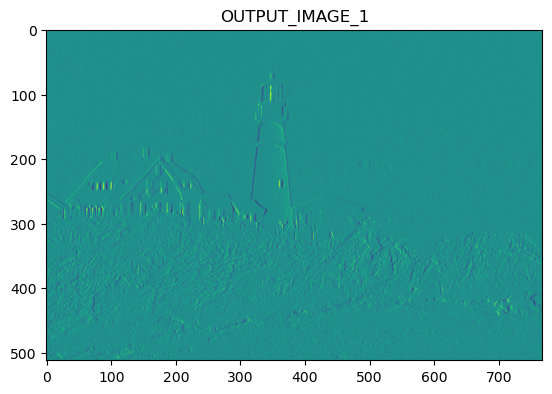

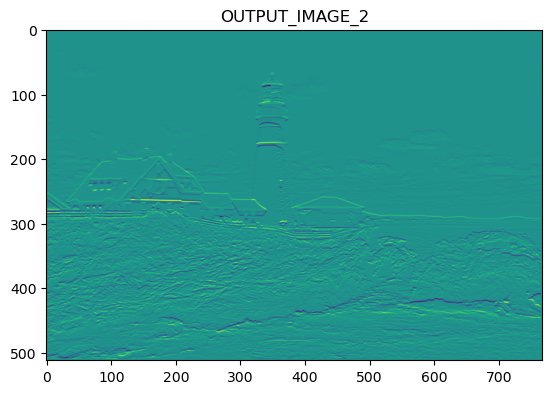

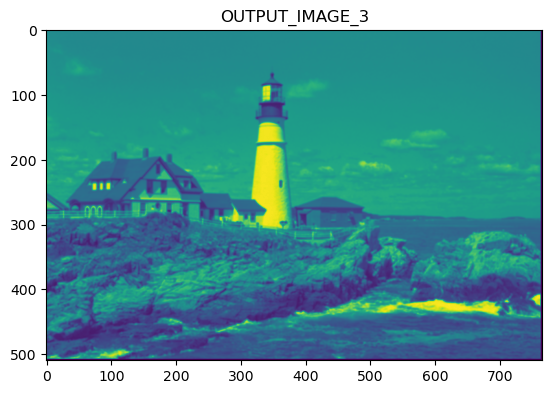

In [52]:
kernel1 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    
kernel2 = np.array([[-1, -1, -1],
                  [0, 0, 0],
                  [1, 1, 1]])

kernel3 =  1/256 * np.array([[1, 4, 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4, 6, 4, 1]])
output_image_1=convolve2d(gray_image,kernel1)
plt.imshow(output_image_1)
plt.title("OUTPUT_IMAGE_1")
plt.show()
output_image_2=convolve2d(gray_image,kernel2)
plt.imshow(output_image_2)
plt.title("OUTPUT_IMAGE_2")
plt.show()
output_image_3=convolve2d(gray_image,kernel3)
plt.imshow(output_image_3)
plt.title("OUTPUT_IMAGE_3")
plt.show()


Kernel1--->Vertical Edge Detection\
Kernel2--->Horizontal Edge Detection\
Kernel3---> 2D Gaussian Kernel which gives smoother image(Less noisy)

## C. Filtering
Here, we introduce the [image filtering function](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) of **OpenCV** and investigate their denoising performance on an image corrupted by salt and pepper noise.

First, use the function `add_salt_pepper_noise` from task A and apply salt and pepper noise to `kodim21.png`.

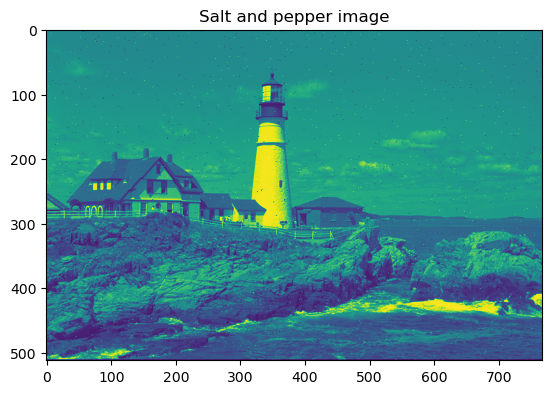

In [8]:
salt_and_pepper_image=add_salt_pepper_noise(gray_image)
plt.imshow(salt_and_pepper_image)
plt.title("Salt and pepper image")
plt.show()

Then, apply the **OpenCV** filters for averaging, gaussian blur, median and bilateral filtering.

In [9]:

#AVERAGING
blur = cv2.blur(salt_and_pepper_image,(5,5))

#GAUSSIAN BLUR
gaussian_blur=cv2.GaussianBlur(salt_and_pepper_image,(5,5),0)

#MEDIAN
median = cv2.medianBlur(salt_and_pepper_image,5)

#BILATERAL FILTERING
bilateral=cv2.bilateralFilter(salt_and_pepper_image,9,75,75)



Plot the filter outputs and the initial noisy image side by side. Explain the performance of each filter and give an argument for why the best performing filter works so well in this scenario.

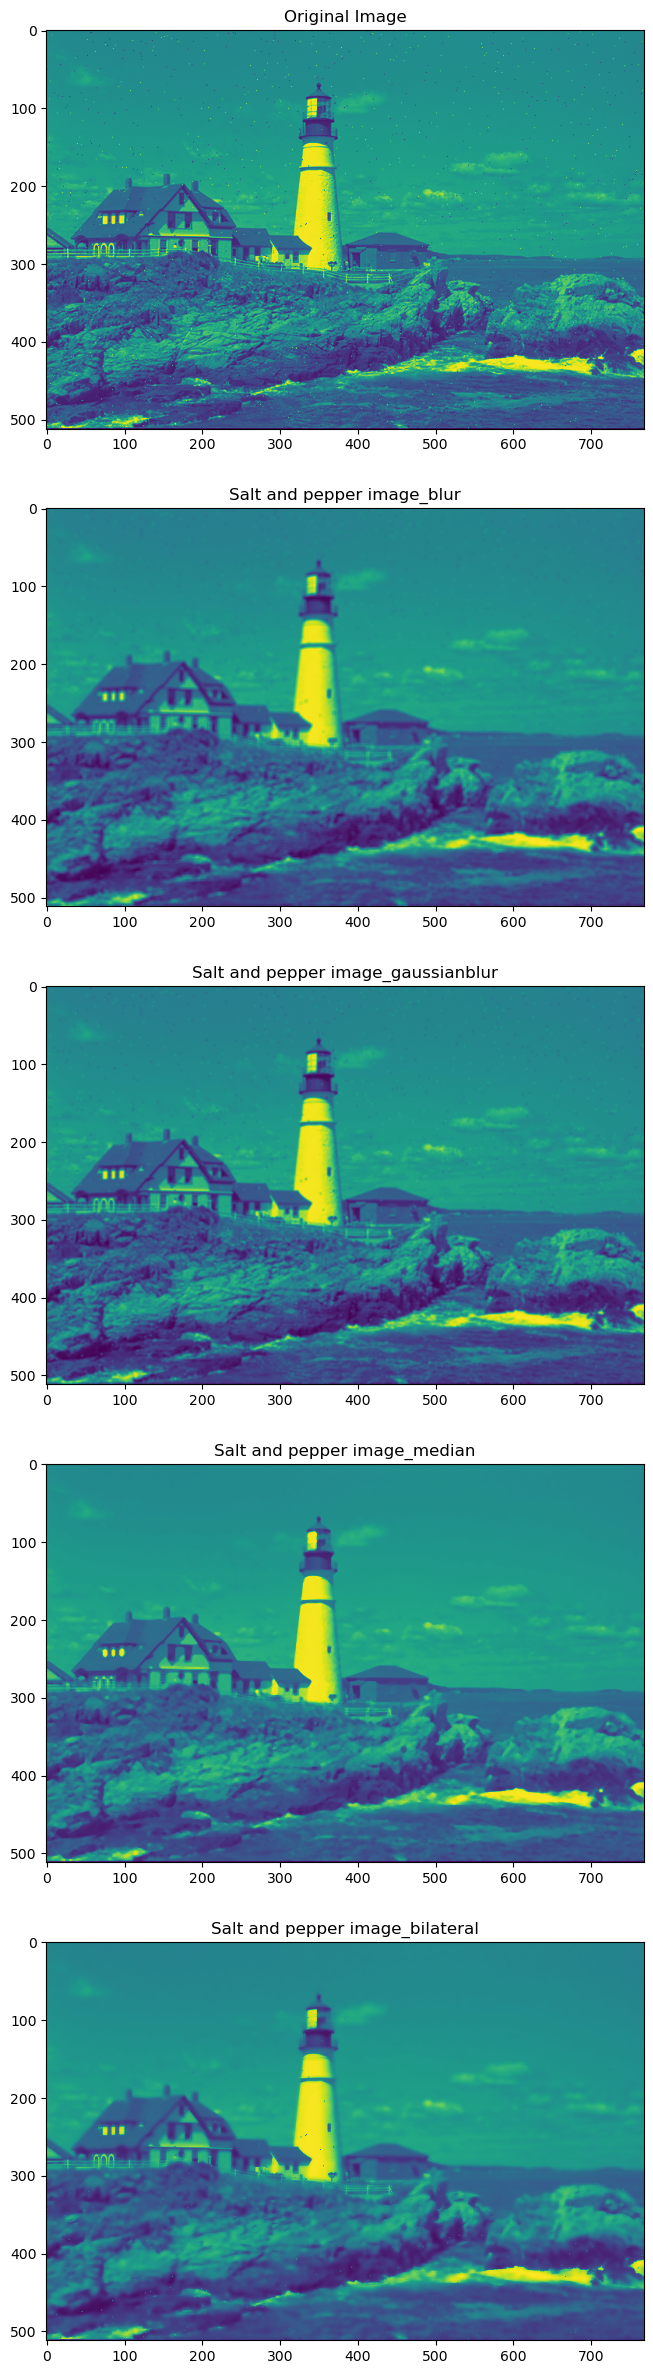

In [10]:
# plt.imshow(salt_and_pepper_image)
# plt.title("Salt and pepper image")
# plt.show()
fig,ax=plt.subplots(5,1,figsize=(30,30))
ax[0].imshow(salt_and_pepper_image)
ax[0].set_title("Original Image")
ax[1].imshow(blur)
ax[1].set_title("Salt and pepper image_blur")
ax[2].imshow(gaussian_blur)
ax[2].set_title("Salt and pepper image_gaussianblur")
ax[3].imshow(median)
ax[3].set_title("Salt and pepper image_median")
ax[4].imshow(bilateral)
ax[4].set_title("Salt and pepper image_bilateral")
plt.show()

1. **Average Filter**  : Computes the average value of pixels in a local neighborhood
2. **Gaussian Filter** : Applies weights based on a Gaussian distribution to give more emphasis to nearby pixels.
3. **Median Filter**   : Replaces each pixel value with the median value in its local neighborhood.
4. **Bilateral Filter**:Considers both spatial and intensity differences when smoothing the image.

For the given image with Salt and pepper noise **Median Filter** works well as it is suitable for **preserving edges**.